C:\Users\kaust\AppData\Local\Temp\ipykernel_21788\426638472.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\kaust\AppData\Local\Temp\ipykernel_21788\426638472.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Model Accuracy: 0.7988826815642458


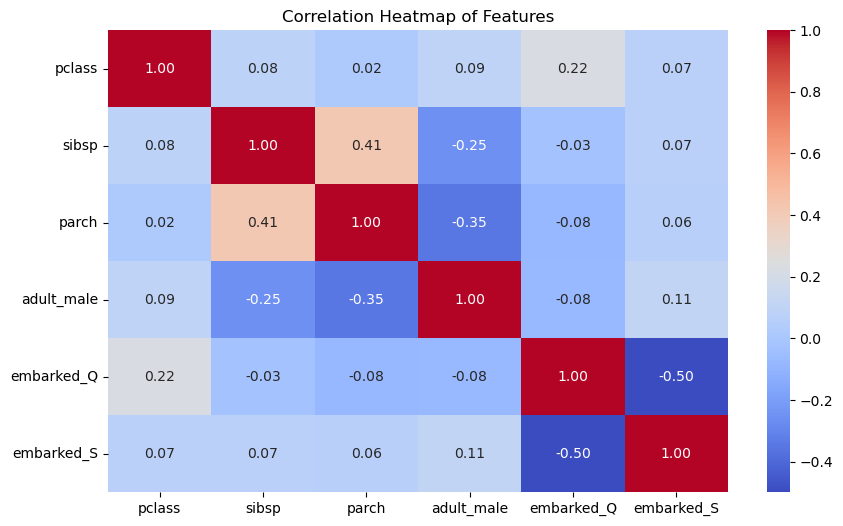

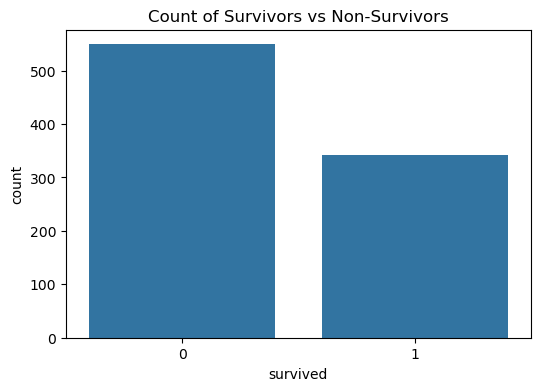

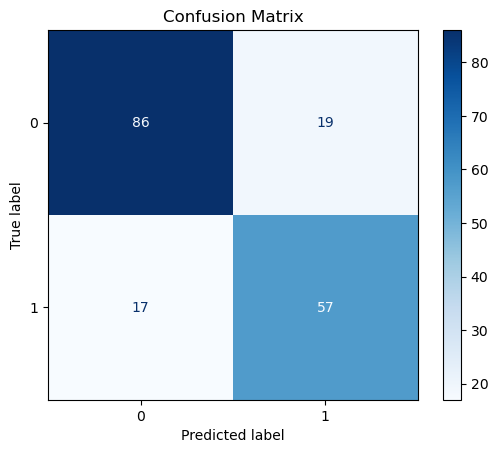

In [2]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Loading Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Data Preprocessing
# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# One-hot encode 'embarked' column
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Drop columns that are not needed for prediction
df.drop(['who', 'sex', 'deck', 'embark_town', 'alive', 'alone', 'class', 'age', 'fare'], axis=1, inplace=True)

# Features and target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Plotting graphs
# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# 2. Count Plot for Target Variable (Survived)
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Count of Survivors vs Non-Survivors')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Save environment dependencies to requirements.txt
!pip freeze > requirements.txt
